# Supervised Learning - BERT Model training and implementation
Welcome to our BERT Model training and implementation workbook. We explore the training and testing of our BERT and Distilled Models on Air BnB dataset here

## Modules download

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jun 19 05:31:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import folium
import math
import numpy as np
import re
import seaborn as sns
#from google.colab import files
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
pd.set_option('display.max_colwidth', None)
from tqdm import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

!pip install yellowbrick
!pip install textblob
!pip install wordcloud
!pip install vaderSentiment
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## All purpose
import pandas as pd
import numpy as np
from google.colab import drive


## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
#from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
## Deeplearning/ML
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve
#from sklearn.metrics import plot_confusion_matrix

Run the following code if using Google Colab

### Data file description
We used the file from the earlier supervised learning (traditional machine learning models) performed. This file has the sentiment and normalized sentiment score.

In [ ]:
drive.mount("/content/drive")
path="/content/drive/MyDrive/M2/Reviews_w_sentiment_score_data.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

Mounted at /content/drive


,Unnamed: 0,listing_id,reviewer_name,comments2,id,final_review_score,score_label,Sentiment_Score,Sentiment,normalized_Sentiment_score,normalize_rating_score
0,0,109,Edwin,The host canceled my reservation the day before arrival.,109,4.285714,high,0.0000,Neutral,2.50,4.25
1,1,109,Jenn,"Me and two friends stayed for four and a half months. It was a great place to stay! The apartment was very comfortable and I really enjoyed having the park with running path across the street. The only downside was it wasnt within walking distance to restaurants, bars, or coffee shops. But they are a short drive away. Overall, great stay!",109,4.285714,high,0.9316,Positive,4.75,4.25
2,2,2708,Kuberan,i had a wonderful stay. Everything from start to the end was perfect. Will come back again.,2708,4.912857,high,0.8126,Positive,4.50,5.00
3,3,2708,Camilla,"Charles is just amazing and he made my stay special. He is so nice, helpful and absolutely polite. Charles is always there when you need some advice or help and totally respects your privacy too. I could concentrate on my work while Charles was doing his work also absolutely quiet. The apartment is perfectly tidy, very clean, with tasty furniture and beautiful details. My bedroom even had a desk in it. Also, the apartment is located in a perfect area, most sightseeing spots are in walking distance and there are some very nice restaurants around as well. I highly recommend this place!",2708,4.912857,high,0.9909,Positive,5.00,5.00
4,4,2708,Fallon,Staying with Chas was an absolute pleasure. He was very accommodating and respectful of personal space. He is truly a nice person. He was very helpful and I am grateful that he opened up his home to me. I am glad to have met him.,2708,4.912857,high,0.9672,Positive,5.00,5.00


In [ ]:
df.isna().sum()

Unnamed: 0                    0
listing_id                    0
reviewer_name                 2
comments2                     0
id                            0
final_review_score            0
score_label                   0
Sentiment_Score               0
Sentiment                     0
normalized_Sentiment_score    0
normalize_rating_score        0
dtype: int64

***

In [ ]:
df2 = df.copy()

In [ ]:
### this is when the labelling starts

def label_score(row):
    if row['normalized_Sentiment_score'] == 5.0:
        return 4
    elif row['normalized_Sentiment_score'] == 4.75:
        return 3
    elif row['normalized_Sentiment_score'] == 4.5:
        return 2
    elif row['normalized_Sentiment_score'] == 4.25:
        return 1
    else:  # for 4.0 and lower
        return 0

df2['label'] = df2.apply(label_score, axis=1)

In [ ]:
df2.describe()


,Unnamed: 0,listing_id,id,final_review_score,Sentiment_Score,normalized_Sentiment_score,normalize_rating_score,label
count,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06
mean,6.555755e+05,4.434812e+16,4.434812e+16,4.841691e+00,8.269747e-01,4.577832e+00,4.858903e+00,2.671066e+00
std,3.784971e+05,1.645802e+17,1.645802e+17,1.485141e-01,2.491615e-01,6.343306e-01,1.803327e-01,1.350041e+00
min,0.000000e+00,1.090000e+02,1.090000e+02,2.857143e-01,-9.987000e-01,0.000000e+00,2.500000e-01,0.000000e+00
25%,3.277878e+05,9.960144e+06,9.960144e+06,4.797143e+00,8.002000e-01,4.500000e+00,4.750000e+00,2.000000e+00
50%,6.555755e+05,2.182754e+07,2.182754e+07,4.880000e+00,9.151000e-01,4.750000e+00,5.000000e+00,3.000000e+00
75%,9.833632e+05,3.974507e+07,3.974507e+07,4.931429e+00,9.623000e-01,5.000000e+00,5.000000e+00,4.000000e+00
max,1.311151e+06,8.379426e+17,8.379426e+17,5.000000e+00,9.998000e-01,5.000000e+00,5.000000e+00,4.000000e+00


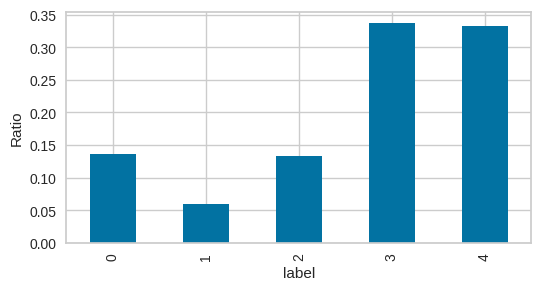

In [ ]:
plot_labels(df2, label = "label")

In [ ]:
RANDOM_SEED = 42
label_count_1, label_count_2, label_count_0, label_count_4, label_count3 = df2['label'].value_counts().sort_values()

label_0 = df2[df2['label'] == 0]
label_1 = df2[df2['label'] == 1]
label_2 = df2[df2['label'] == 2]
label_3 = df2[df2['label'] == 3]
label_4 = df2[df2['label'] == 4]

print('Bad:', label_0.shape)
print('Nay:', label_1.shape)
print('Average:', label_2.shape)
print('Good:', label_3.shape)
print('Awesome:', label_4.shape)
print('Nay-lowest-count:', label_count_1)

### because label 1 is the lowest:
label_0_under = label_0.sample(label_count_1, random_state = RANDOM_SEED)
label_2_under = label_2.sample(label_count_1, random_state = RANDOM_SEED)
label_3_under = label_3.sample(label_count_1, random_state = RANDOM_SEED)
label_4_under = label_4.sample(label_count_1, random_state = RANDOM_SEED)

cleaned_df = pd.concat([label_0_under, label_1, label_2_under, label_3_under, label_4_under], axis = 0)


Bad: (178216, 12)
Nay: (79067, 12)
Average: (174935, 12)
Good: (442500, 12)
Awesome: (436434, 12)
Nay-lowest-count: 79067


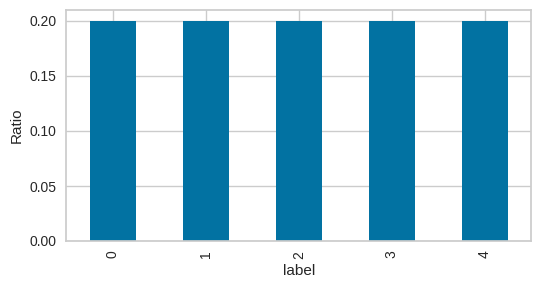

79067
79067
79067
79067
79067


In [ ]:
plot_labels(cleaned_df, label = "label")
print(len(cleaned_df[cleaned_df['label']==0]))
print(len(cleaned_df[cleaned_df['label']==1]))
print(len(cleaned_df[cleaned_df['label']==2]))
print(len(cleaned_df[cleaned_df['label']==3]))
print(len(cleaned_df[cleaned_df['label']==4]))


In [ ]:

"""
    Splits the dataframe into training, validation and testing sets.

    Args:
        df (pd.DataFrame): The input dataframe.
        fractions (list-like): A list-like object of proportions for the train, validation and test set respectively,
            e.g., for a 60%/20%/20% split, fractions could be [0.6, 0.2, 0.2].
        RANDOM_SEED (int): Seed for the random number generator.

    Returns:
        train_df (pd.DataFrame): The training set.
        val_df (pd.DataFrame): The validation set.
        test_df (pd.DataFrame): The testing set.

    Raises:
        ValueError: If the fractions do not add up to 1.
        ValueError: If the number of instances across all sets do not match the number of instances in the original dataframe."""




fractions = np.array([0.8, 0.1, 0.1])


def data_split(df, fractions, RANDOM_SEED):

    # shuffling the data:

    df = df.sample(frac = 1, random_state = RANDOM_SEED)
    # split into training, validation and testing sets
    train_df, val_df, test_df = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

    if len(train_df) + len(val_df) + len(test_df) != len(df):
        raise ValueError("Number of instances in splits do not match original dataframe")
        print("Check the splitting method please!")
    else:
        return train_df, val_df, test_df

In [ ]:
df_train, df_dev, df_test = data_split(cleaned_df, fractions, RANDOM_SEED)

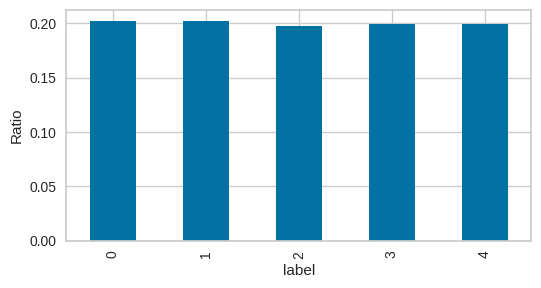

In [ ]:
plot_labels(df_dev, label = 'label')

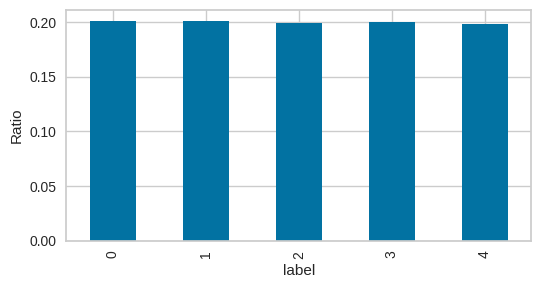

In [ ]:
plot_labels(df_test, label = 'label')

In [ ]:
df_train.head()
df_train.shape

(316268, 12)

 ***

## Feature Engineering / Exploration

### Tokenization

In this part, we will tokenize reviews and count numbers of tokens for each review. This information will be useful in BERT model (sensitivity analysis). But please note we will not use these tokens directly for training models.

In [ ]:
from nltk.tokenize import word_tokenize

Parse through the first line, see what it does

In [ ]:
ds_temp = df_train["comments2"].iloc[:10].map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).map(lambda comments2: comments2.split())
print(df_train["comments2"].iloc[0], '\n', ds_temp.iloc[0])

Great place. 
 ['Great', 'place']


In [ ]:
%time df_train["tokens"] = df_train["comments2"].map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).map(lambda comments2: comments2.split())

CPU times: user 2.64 s, sys: 318 ms, total: 2.96 s
Wall time: 2.95 s


In [ ]:
num_train = df_train.shape[0]
num_review = df2.shape[0]

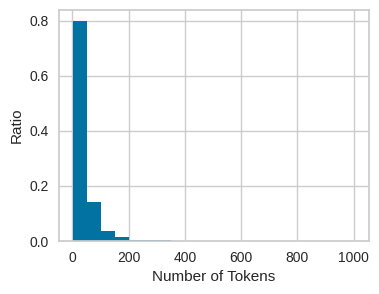

In [ ]:
df_train["num_tokens"] = df_train["tokens"].map(len)
ax = df_train["num_tokens"].hist(bins=20,
                                 figsize=(4,3),
                                 weights=np.ones(num_train)/num_train)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.show()

In [ ]:
### to see number of reviews with tokens more than 128 vs 256

print(len(df_train[df_train["num_tokens"] <= 128]) / len(df_train["num_tokens"]))
print(len(df_train[df_train["num_tokens"] <= 256]) / len(df_train["num_tokens"]))

0.9662533041597633
0.995254025067348


df_train.drop(columns=["tokens", "num_tokens"], inplace=True)

In [ ]:
%time df2["num_tokens"] = df2["comments2"].\
map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).\
map(lambda comments2: len(comments2.split()))

CPU times: user 8.81 s, sys: 149 ms, total: 8.96 s
Wall time: 9.67 s


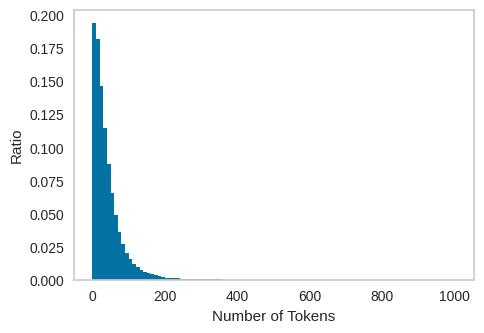

In [ ]:
ax = df2["num_tokens"].hist(bins=100,
                                  figsize=(5,3.5),
                                  grid=False,
                                  weights=np.ones(num_review)/num_review)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.savefig("num_tokens.eps")
plt.tight_layout()
plt.show()

In [ ]:
print(len(df2[df2["num_tokens"] <= 128]) / len(df2["num_tokens"]))
print(len(df2[df2["num_tokens"] <= 256]) / len(df2["num_tokens"]))

0.9550608930162178
0.9943065334911589


In [ ]:
df2.drop(columns=["num_tokens"], inplace=True)

From the result, we can see most reviews are shorter than 256 tokens, which is important for our use later

 ***

# Vectorization

We will try following settings for vectorization.

* Word representation: `CountVectorizer` vs. `TfidfVectorizer`
* N-grams: unigram & bigram
* Minimum document frequency: 5
* Convert to lowercase
* Use stop words
* Try binary counter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def extract_features(df_train, df_dev, df_test):


    ### vectorization
    vectorizer = TfidfVectorizer(analyzer='word',
                               stop_words='english',
                               ngram_range=(1, 2),
                               lowercase=True,
                               min_df=5,
                               binary=False)
    X_train = vectorizer.fit_transform(df_train["comments2"])
    X_dev = vectorizer.transform(df_dev["comments2"])
    X_test = vectorizer.transform(df_test["comments2"])
    y_train = df_train["label"].tolist()
    y_dev = df_dev["label"].tolist()
    y_test = df_test["label"].tolist()

    return X_train, X_dev, X_test, y_train, y_dev, y_test

In [ ]:
%time X_train, X_dev, X_test, y_train, y_dev, y_test = extract_features(df_train, df_dev, df_test)

CPU times: user 16.2 s, sys: 312 ms, total: 16.5 s
Wall time: 16.5 s


In [ ]:
#print(X_train.shape), print(X_dev.shape), print(y_train.shape), print(y_dev.shape)

***

# BERT IMPLEMENTATION

In [ ]:
%pip install simpletransformers
from simpletransformers.classification import ClassificationModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.9

In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'listing_id', 'reviewer_name', 'comments2', 'id',
       'final_review_score', 'score_label', 'Sentiment_Score', 'Sentiment',
       'normalized_Sentiment_score', 'normalize_rating_score', 'label',
       'tokens', 'num_tokens'],
      dtype='object')

In [ ]:
# Make a new DataFrame with just the text and label columns
train_Bert_df = df_train[['comments2', 'label']]
train_Bert_texts  = train_Bert_df['comments2'].values.tolist()
train_Bert_labels = train_Bert_df['label'].values.tolist()

***
***

## **LOAD** The Above codes till here.



BERT Training and model implementation starts here.


The next few steps is to train the BERT model using pretrain model from pre-exisiting tensor dataset trained on wiki pages, youtube etc. It is then applied on our dataset

- It takes 6 hours to train
- saves model in the drive

In [ ]:
# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
# Only for model training, don't run otherwise -- ># Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Encode the labels
le = LabelEncoder()
df_train['encoded_labels'] = le.fit_transform(df_train['label'])

In [ ]:
## Only for model training, don't run otherwise -- > Tokenize the text data
encoded_data_train = tokenizer.batch_encode_plus(
    df_train['comments2'].tolist(),
    truncation=True,
    padding=True,
    max_length=256
)


In [ ]:
# Only for model training, don't run otherwise -- >
input_ids_train = torch.tensor(encoded_data_train['input_ids'])
attention_masks_train = torch.tensor(encoded_data_train['attention_mask'])
labels_train = torch.tensor(df_train['encoded_labels'].values)

In [ ]:
# Only for model training, don't run otherwise -- >
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler

# Create a DataLoader
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=32)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [ ]:
# Only for model training, don't run otherwise -- > IMPORTANT FUNCTION, takes 5.0hours
# Training loop
num_epochs = 5
model.train()
for epoch in range(num_epochs):
    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0]
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

In [ ]:
# Only for model training, don't run otherwise -- > save to drive
model.save_pretrained("/content/drive/MyDrive")

#/content/drive/MyDrive/M2/

Loading of BERT Model begins here

In [ ]:
### LOAD MODEL FROM HERE
###Step 1
from torch.utils.data import SequentialSampler
# Load the trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/M2/Supervised_Learning/Full_Model")
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)




BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
### Step 2
# Encode the labels
le = LabelEncoder()
df_test['encoded_labels'] = le.fit_transform(df_test['label'])

# Tokenize the text data
encoded_data_test = tokenizer.batch_encode_plus(
    df_test['comments2'].tolist(),
    truncation=True,
    padding=True,
    max_length=256
)

input_ids_test = torch.tensor(encoded_data_test['input_ids'])
attention_masks_test = torch.tensor(encoded_data_test['attention_mask'])
labels_test = torch.tensor(df_test['encoded_labels'].values)



In [ ]:
### Step 3
# Create a DataLoader
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, sampler=SequentialSampler(dataset_test), batch_size=32)

# Evaluation mode
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
#### Step 4, to do the prediction

# Variable to store predictions
predictions = []

# Predict on test data
for batch in dataloader_test:
    batch = tuple(b.to(device) for b in batch)

    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[1]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)

# Convert logits to predicted class
preds = np.argmax(predictions, axis=1)

In [ ]:
predictions

array([[-2.039121  , -1.3176852 , -0.4517939 ,  6.234849  , -2.5249166 ],
       [-0.06209285,  7.0985374 , -0.7435171 , -3.6768692 , -2.768035  ],
       [ 1.4395556 ,  5.4386663 ,  0.83590084, -3.2408392 , -4.3329663 ],
       ...,
       [-0.23559546,  6.804977  , -1.2970654 , -3.324782  , -2.207187  ],
       [-1.0485826 ,  6.8679914 ,  0.43491995, -3.3395922 , -3.1136487 ],
       [-1.6688787 ,  7.4077744 , -1.1784041 , -2.6579235 , -2.0752192 ]],
      dtype=float32)

In [ ]:
### Step 5: Analysis and evaluation

y = df_test['label'].tolist()

accuracy_score(y, preds)

0.9422016492133354

In [ ]:
print(classification_report(y, preds, digits=3))

              precision    recall  f1-score   support

           0      0.975     0.967     0.971      7943
           1      0.941     0.941     0.941      7954
           2      0.951     0.907     0.928      7878
           3      0.926     0.902     0.914      7908
           4      0.919     0.994     0.955      7851

    accuracy                          0.942     39534
   macro avg      0.943     0.942     0.942     39534
weighted avg      0.943     0.942     0.942     39534



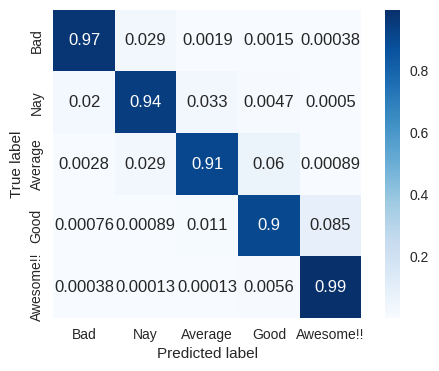

In [ ]:
### Step 5: Analysis and evaluation
# Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix(y, preds, normalize='true'), range(5), range(5))

labels = ["Bad", "Nay", "Average", "Good", "Awesome!!"]

model_name = "BERT_base"
plt.figure(figsize=(6,4))
ax = sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
ax.set_xticklabels(labels)  # Set x-axis labels
ax.set_yticklabels(labels)  # Set y-axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Save the plot
#plt.savefig(model_name + "_" + label.lower() + ".eps")

plt.show()

DistilBERT model is a distilled form of the BERT model. The size of a BERT model was reduced by 40% via knowledge distillation during the pre-training phase while retaining 97% of its language understanding abilities and being 60% faster.

In [ ]:
# Only for model training, don't run otherwise -- ># Use a GPU if available

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch


# Load pre-trained model and tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


# Adjust num_labels to the number of unique labels in your dataset
distilled_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=df_train['label'].nunique())

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.

250000

In [ ]:
# Only for model training, don't run otherwise -- ># Use a GPU if available

distilled_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distilled_model.to(distilled_device)

# Encode the labels
distilled_le = LabelEncoder()
df_train['distilled_encoded_labels'] = distilled_le.fit_transform(df_train['label'])



## Only for model training, don't run otherwise -- > Tokenize the text data
distilled_encoded_data_train = tokenizer.batch_encode_plus(
    df_train['comments2'].tolist(),
    truncation=True,
    padding=True,
    max_length=256
)


# Only for model training, don't run otherwise -- >
distilled_input_ids_train = torch.tensor(distilled_encoded_data_train['input_ids'])
distilled_attention_masks_train = torch.tensor(distilled_encoded_data_train['attention_mask'])
distilled_labels_train = torch.tensor(df_train['distilled_encoded_labels'].values)

In [ ]:
# Only for model training, don't run otherwise -- >
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler

# Create a DataLoader
distilled_dataset_train = TensorDataset(distilled_input_ids_train, distilled_attention_masks_train, distilled_labels_train)
distilled_dataloader_train = DataLoader(distilled_dataset_train, sampler=RandomSampler(distilled_dataset_train), batch_size=32)
# Define the optimizer
distilled_optimizer = AdamW(distilled_model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [ ]:
# Only for model training, don't run otherwise -- > IMPORTANT FUNCTION, takes 2.5hours
# Training loop
num_epochs = 5
distilled_model.train()
for epoch in range(num_epochs):
    for batch in distilled_dataloader_train:
        batch = tuple(b.to(distilled_device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = distilled_model(**inputs)
        loss = outputs[0]
        loss.backward()
        distilled_optimizer.step()
        distilled_optimizer.zero_grad()


distilled_model.save_pretrained("/content/drive/MyDrive/M2/Supervised_Learning/Distilled_Model")

In [ ]:
### LOAD MODEL FROM HERE
###Step 1

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch

distilled_model = DistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/M2/Supervised_Learning/Distilled_Model")
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distilled_model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
### Step 2
# Encode the labels
distilled_le = LabelEncoder()
df_test['distilled_encoded_labels'] = distilled_le.fit_transform(df_test['label'])
# Tokenize the text data
distilled_encoded_data_test = tokenizer.batch_encode_plus(
    df_test['comments2'].tolist(),
    truncation=True,
    padding=True,
    max_length=256
)
distilled_input_ids_test = torch.tensor(distilled_encoded_data_test['input_ids'])
distilled_attention_masks_test = torch.tensor(distilled_encoded_data_test['attention_mask'])
distilled_labels_test = torch.tensor(df_test['distilled_encoded_labels'].values)



In [ ]:
### Step 3
# Create a DataLoader
from torch.utils.data import SequentialSampler
distilled_dataset_test = TensorDataset(distilled_input_ids_test, distilled_attention_masks_test, distilled_labels_test)
distilled_dataloader_test = DataLoader(distilled_dataset_test, sampler=SequentialSampler(distilled_dataset_test), batch_size=32)
# Evaluation mode
distilled_model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#### Step 4, to do the prediction
# Variable to store predictions
distilled_predictions = []
# Predict on test data
for batch in distilled_dataloader_test:
    batch = tuple(b.to(device) for b in batch)

    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}
    with torch.no_grad():
        outputs = distilled_model(**inputs)
    logits = outputs[1]
    logits = logits.detach().cpu().numpy()
    distilled_predictions.append(logits)
distilled_predictions = np.concatenate(distilled_predictions, axis=0)
# Convert logits to predicted class
distilled_preds = np.argmax(distilled_predictions, axis=1)


In [ ]:
### Step 5: Analysis and evaluation
y = df_test['label'].tolist()
accuracy_score(y, distilled_preds)

0.9370668285526382

In [ ]:
print(classification_report(y, distilled_preds, digits=3))

              precision    recall  f1-score   support

           0      0.978     0.960     0.969      7943
           1      0.944     0.927     0.936      7954
           2      0.930     0.942     0.936      7878
           3      0.950     0.861     0.904      7908
           4      0.890     0.995     0.940      7851

    accuracy                          0.937     39534
   macro avg      0.938     0.937     0.937     39534
weighted avg      0.939     0.937     0.937     39534



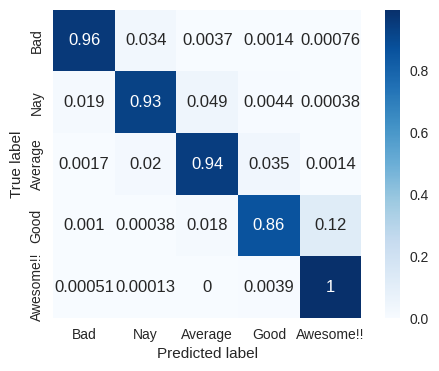

In [ ]:
### Step 5: Analysis and evaluation
# Confusion Matrix
distilled_df_cm = pd.DataFrame(confusion_matrix(y, distilled_preds, normalize='true'), range(5), range(5))

labels = ["Bad", "Nay", "Average", "Good", "Awesome!!"]

model_name = "distilled_BERT_base"
plt.figure(figsize=(6,4))
ax = sns.heatmap(distilled_df_cm, annot=True, cmap=plt.cm.Blues, square=True)
ax.set_xticklabels(labels)  # Set x-axis labels
ax.set_yticklabels(labels)  # Set y-axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Save the plot
#plt.savefig(model_name + "_" + label.lower() + ".eps")

plt.show()

In [ ]:
### testing the model
new_sentence = "This is a great residence, value for money. Tops!"
tokenized_sentence = tokenizer.encode(new_sentence, add_special_tokens=True)
input_ids = torch.tensor([tokenized_sentence]).to(device)
with torch.no_grad():
    outputs = distilled_model(input_ids)

predictions = torch.nn.functional.softmax(outputs[0], dim=-1)
predicted_class = torch.argmax(predictions).item()

print(predicted_class)

3


*** Note *** Following function not in use. It was our initial code, but the GPU couldn't take the load. So we broke up the function to mangeable pieces in order to get it to run.  

In [ ]:

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train_and_evaluate_model(data, max_len, model, tokenizer):
    # Split data into input texts and labels
    input_texts = data['comments2'].tolist()
    labels = data['label'].tolist()  # Replace 'labels' with your actual column name for labels

    # Tokenize the data
    encoded_data = tokenizer.batch_encode_plus(
        input_texts,
        truncation=True,
        padding=True,
        max_length=max_len,
        return_tensors='pt'
    )

    # Prepare inputs for the model
    input_ids = encoded_data['input_ids']
    attention_masks = encoded_data['attention_mask']

    # Convert to torch.Tensor and move to the device
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)
    labels = torch.Tensor(labels).to(device)

    # Create the DataLoader for our training set.
    batch_size = 32  # adjust based on your resources
    dataset = TensorDataset(input_ids, attention_masks, labels)
    dataloader = DataLoader(dataset, sampler=RandomSampler(dataset), batch_size=batch_size)

    # Optimizer
    optimizer = AdamW(model.parameters(), lr=1e-5)  # you can adjust learning rate

    # Training loop
    epochs = 4  # adjust based on your needs
    for epoch in range(epochs):
        model.train()  # enter training mode
        for batch in dataloader:
            inputs = {
                'input_ids': batch[0],
                'attention_mask': batch[1],
                'labels': batch[2].type(torch.long),  # ensure labels are integers
            }

            model.zero_grad()  # clear previous gradients
            outputs = model(**inputs)  # forward pass
            loss = outputs[0]
            loss.backward()  # compute the loss gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # prevent the "exploding gradients" problem
            optimizer.step()  # update parameters

    # After training, evaluate on the validation set
    with torch.no_grad():
        model.eval()  # enter evaluation mode
        predictions = []
        true_labels = []
        for batch in validation_dataloader:
            inputs = {
                'input_ids': batch[0],
                'attention_mask': batch[1],
            }
            outputs = model(**inputs)
            predictions.extend(torch.argmax(outputs[0], dim=1).tolist())
            true_labels.extend(batch[2].tolist())

    performance = accuracy_score(true_labels, predictions)

    return performance

In [ ]:
### Following functions, Colab + not enough ram to run. Got to manually run as per above

***

In [ ]:
from transformers import TFAutoModelForSequenceClassification, DistilBertConfig
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import models
model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5, id2label={0: "Bad", 1: "Nay", 2: "Average", 3: "Good", 4: "Awesome!!" })
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss)

model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_projector', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_39', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 66,957,317
Trainable params: 66,957,317
Non-trainable params: 0
_________________________________________________________________


----- END of Code ----